In [11]:
# signature of aging mouse brain
suppressMessages(library(limma))

In [12]:
path <- '/tank/projects/kriukov_chromatin/RNA/signatures/'
options(warn = -1)

In [13]:
load(paste0(path, 'ageunittable.rdata'))
load(paste0(path, 'exprlist3.rdata'))
load(paste0(path, 'phenolist2.rdata'))
ls()

In [14]:
names <- names(sexyphenolist)
brain_names <- names[grepl("Mouse", names) & grepl("Brain", names)]

In [15]:
male_name <- 'Mouse_GSE132040_Brain_Male'
female_name <- 'Mouse_GSE132040_Brain_Female'

## male

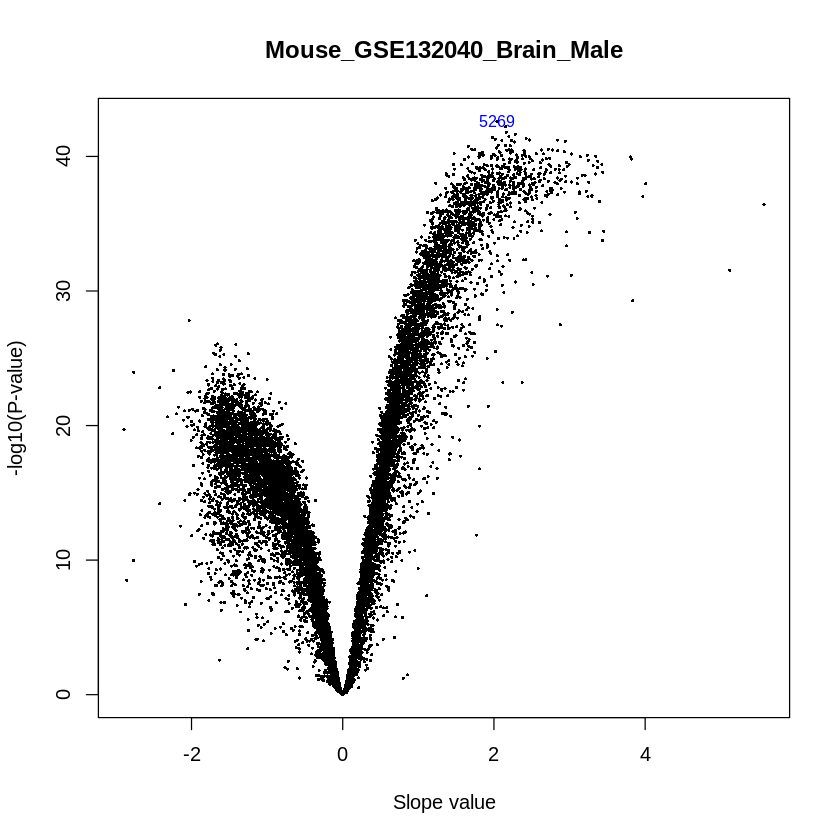

In [16]:
#linear trend analysis
df <- sexyexprlist[[male_name]]
pheno <- sexyphenolist[[male_name]]
time <- pheno$Age

design <- data.frame(row.names=rownames(pheno))
design['Intercept'] <- rep(1, length(rownames(pheno)))
design['Day'] <- time

#analyze
fit <- lmFit(df, design=design)
fit <- eBayes(fit)
result <- topTable(fit, adjust.method = "BH", sort.by="none", coef="Day", n=Inf, confint=T)
result_male <- result[order(result$adj.P.Val),]

volcanoplot(fit, coef = 1, style = "p-value", highlight = 1, hl.col="blue",
            xlab = "Slope value", ylab = NULL, pch=16, cex=0.35, main=male_name)

## female

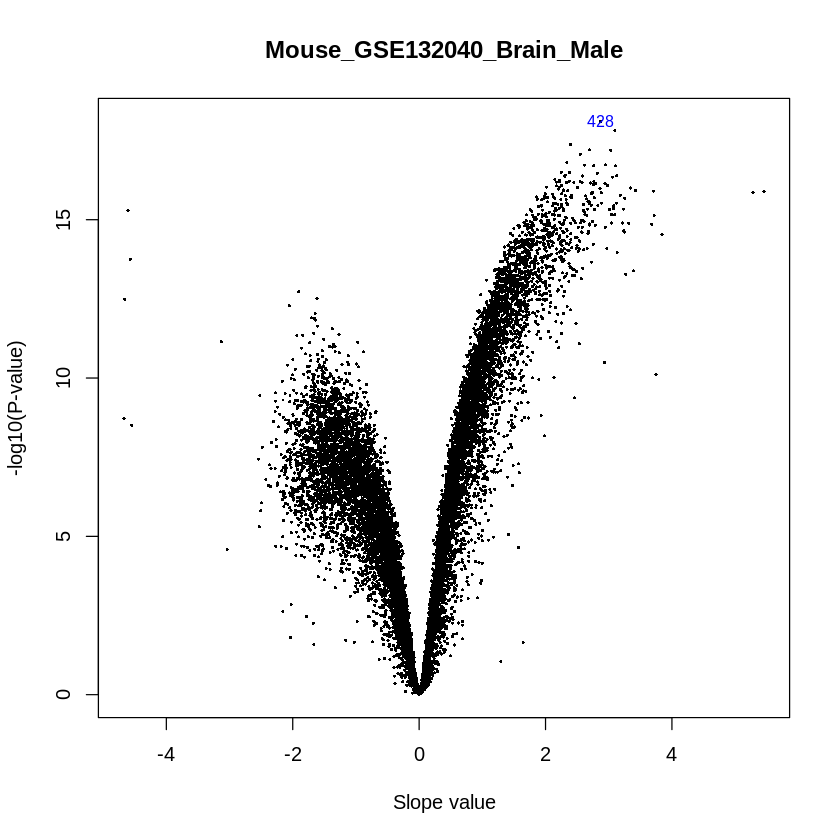

In [17]:
df <- sexyexprlist[[female_name]]
pheno <- sexyphenolist[[female_name]]
time <- pheno$Age

#linear trend analysis
design <- data.frame(row.names=rownames(pheno))
design['Intercept'] <- rep(1, length(rownames(pheno)))
design['Day'] <- time

#analyze
fit <- lmFit(df, design=design)
fit <- eBayes(fit)
result <- topTable(fit, adjust.method = "BH", sort.by="none", coef="Day", n=Inf, confint=T)
result_female <- result[order(result$adj.P.Val),]

volcanoplot(fit, coef = 1, style = "p-value", highlight = 1, hl.col="blue",
            xlab = "Slope value", ylab = NULL, pch=16, cex=0.35, main=male_name)

## both

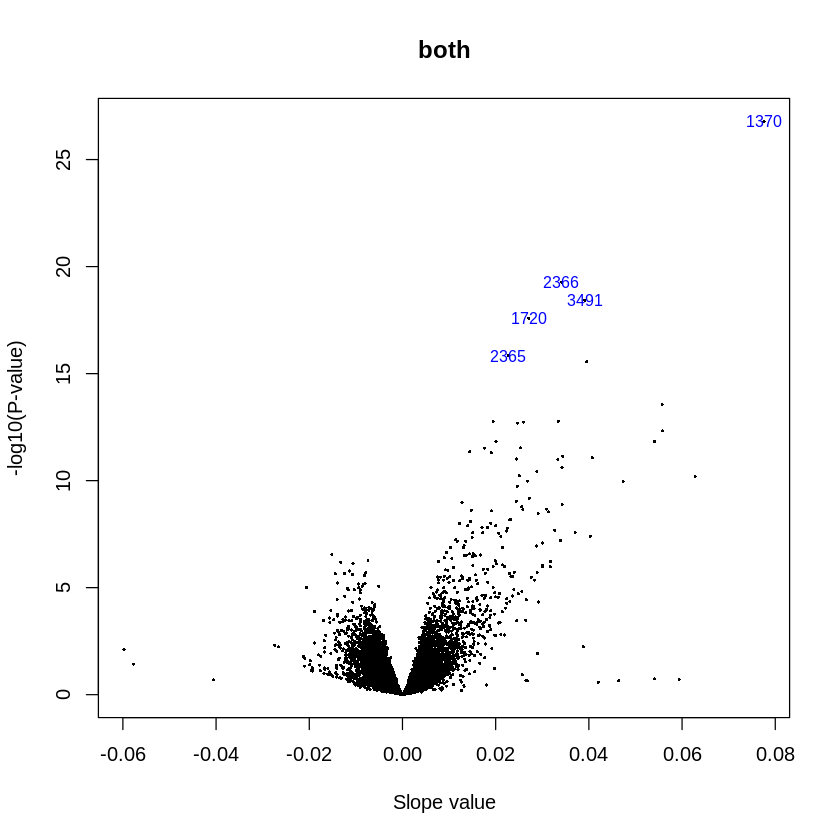

In [18]:
dfm <- sexyexprlist[[male_name]]
dff <- sexyexprlist[[female_name]]
df <- transform(merge(dfm, dff, by.x=0, by.y=0), row.names=Row.names, Row.names=NULL)
time <- c(sexyphenolist[[male_name]]$Age, sexyphenolist[[female_name]]$Age)

#linear trend analysis
design <- data.frame(row.names=colnames(df))
design['Intercept'] <- rep(1, length(colnames(df)))
design['Day'] <- time

#analyze
fit <- lmFit(df, design=design)
fit <- eBayes(fit)
result <- topTable(fit, adjust.method = "BH", sort.by="none", coef="Day", n=Inf, confint=T)
result_both <- result[order(result$adj.P.Val),]
result <- result[order(result$adj.P.Val),]

volcanoplot(fit, coef = 2, style = "p-value", highlight = 5, hl.col="blue",
            xlab = "Slope value", ylab = NULL, pch=16, cex=0.35, main='both')

In [19]:
head(result)

,logFC,CI.L,CI.R,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12268,0.07758347,0.07074176,0.08442518,22.79601,1.634452e-27,2.187387e-23,52.22717
14972,0.03402540,0.02951552,0.03853527,15.16676,5.253195e-20,3.515175e-16,34.70188
19039,0.03908641,0.03364346,0.04452935,14.43598,3.743713e-19,1.670071e-15,32.71122
13040,0.02709556,0.02312819,0.03106292,13.72936,2.656723e-18,8.888730e-15,30.72534
14964,0.02266675,0.01897869,0.02635482,12.35507,1.434693e-16,3.840099e-13,26.68497
14580,0.03956390,0.03300863,0.04611917,12.13286,2.796958e-16,6.238615e-13,26.00915


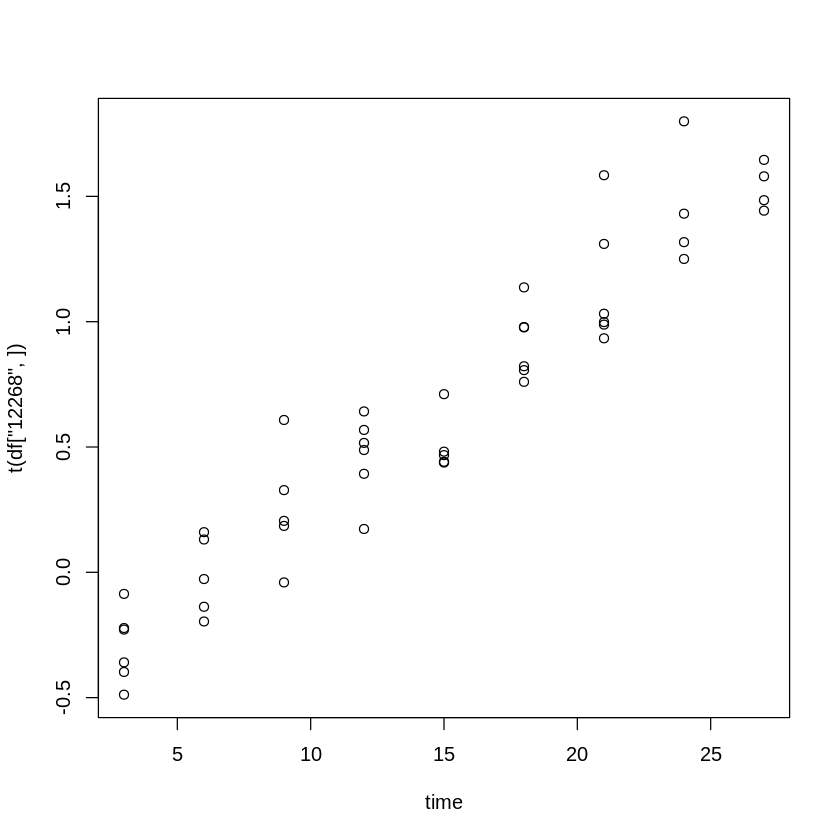

In [20]:
plot(time, t(df['12268',]))

In [130]:
write.csv(result, 'subdata/diffexp_result.csv')